In [1]:
import sys
import pandas as pd
import numpy as np
import mglearn
import sklearn
import matplotlib.pyplot as plt

# Clustering
- goal is to split up the data in such a way that points within a single cluster are very simliar and points in different clusters are different
- assign (or predict) a number to each data point, indicating which cluster a particular point belongs

## k-Means Clustering
- one of simplest and most commonly used clustering algorithms
- finds *cluster centers* that are representative of certain regions of the data
- alternates between two steps:
    - assigning each data point to the closest cluster center
    - resetting each cluster center as the mean of the data points that are assigned to it
    



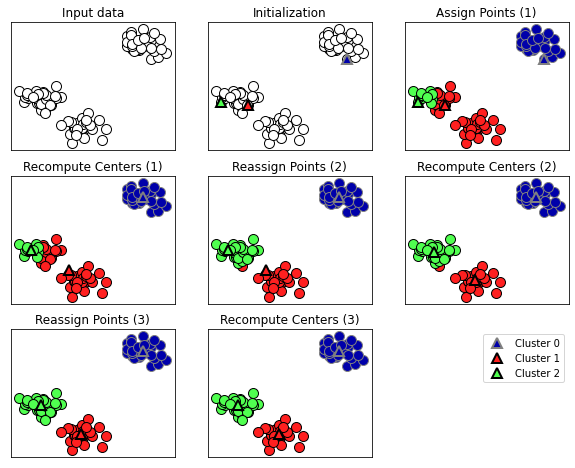

In [2]:
mglearn.plots.plot_kmeans_algorithm()


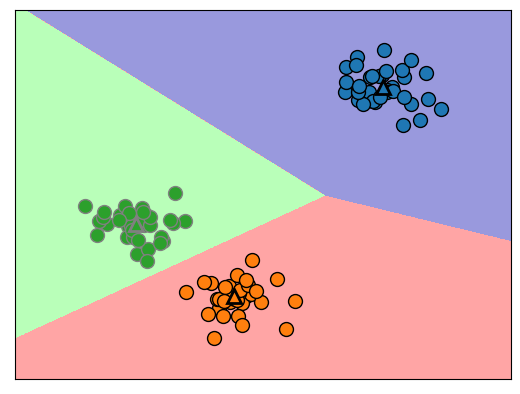

In [3]:
mglearn.plots.plot_kmeans_boundaries()

In [4]:
# apply k-means with scikit-learn with synthetic data
# this does require setting the parameter of n_clusters
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [5]:
print("Cluster memberships: \n{}".format(kmeans.labels_))
print(kmeans.predict(X))

Cluster memberships: 
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


- similar to classification in that the algorithm assigns a label to each point, however, there is no ground truth so the labels themselves have no a priori meaning.
- due to the random nature of the initialization of the cluster centroids, there is no expectation running this algorithm again that those data points labeled '2' are labeled '2' again, but they could be labeled '1' or '0', depending on their relationship to the randomly initialized cluster centroids.

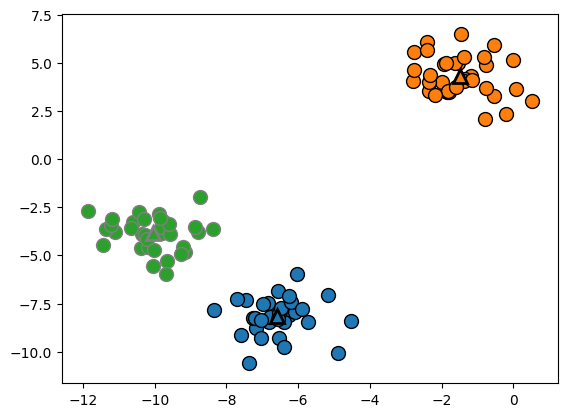

In [6]:
mglearn.discrete_scatter(X[:,0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2],
    markers='^', markeredgewidth=2
)

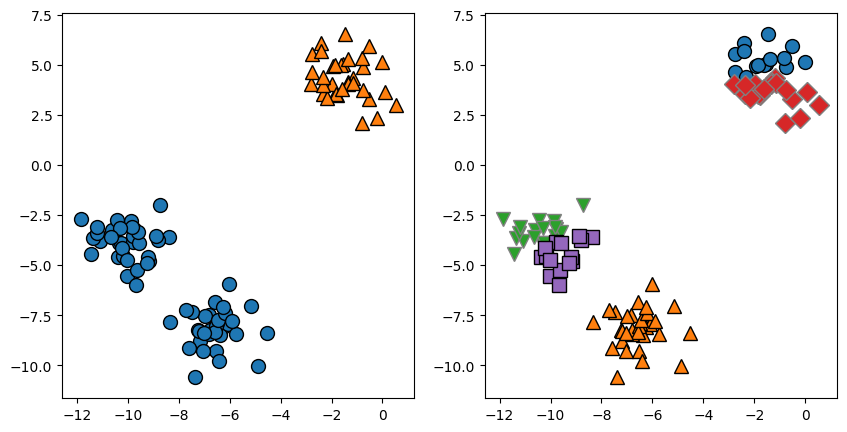

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

#using two cluster centers
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[0])

#using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[1])

### Failure cases of k-means
- knowing the "right" number of clusters for a given dataset, may not always result in k-means algorithm being able to recover them
- clusters are defined by their center, and therefore produces clusters that are a convex shape, capturing relatively simple shapes
- assumes that all clusters have the same "diameter" in some sense, as clusters are bounded precisely the bisectional distance between themselves.

Text(0, 0.5, 'Feature 1')

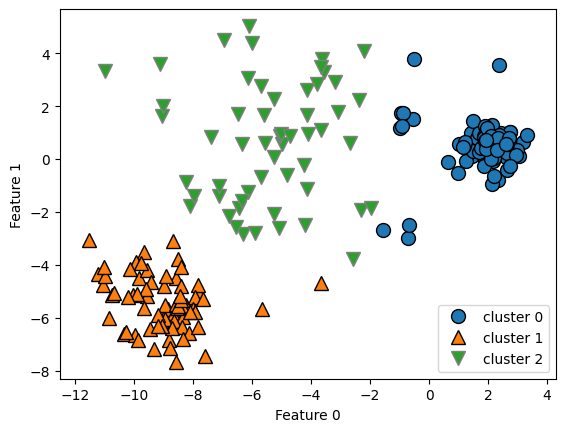

In [8]:
X_varied, y_varied = make_blobs(n_samples=200,
    cluster_std=[1.0, 2.5, 0.5],
    random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


- kmeans assumes that all directions are equally important for each cluster

Text(0, 0.5, 'Feature 1')

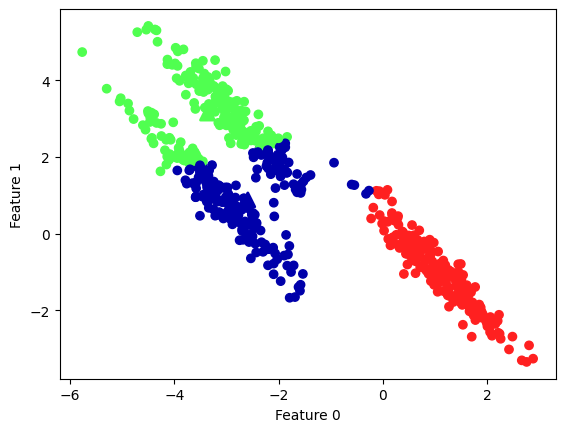

In [9]:
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

#transform the data to be stretched
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
    marker='^', c=[0,1,2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- with the data stretched toward the diagonal, and k-means only considering the distance to the nearest cluster center, it can't handle this kind of data well
- it also performs poorly if the clusters have more complex shapes

Text(0, 0.5, 'Feature 1')

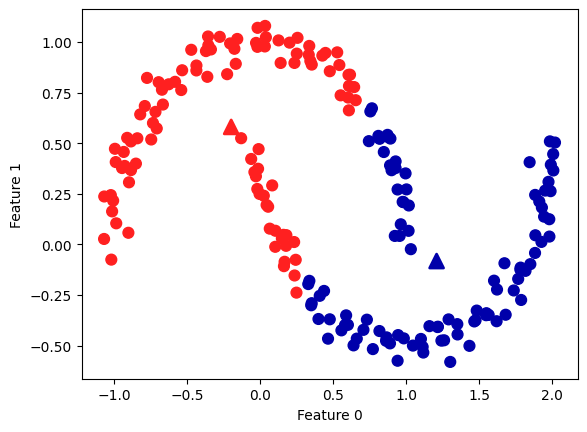

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Vector quantization, or seeing k-means as decomposition
- parallels between k-means and the decomposition methods like PCA and NMF
    - Both PCA and NMF try to express the data points as a sum over some components. Each point in k-means is being represented using only a single component (given by the cluster center). This view as a method of decomposition is call vector quantization


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1 
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255


X_train, X_test, y_train ,y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0
)


In [ ]:

nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)


In [ ]:
kmeans.predict(X_test)

NameError: name 'ax' is not defined

AttributeError: 'NMF' object has no attribute 'components_'

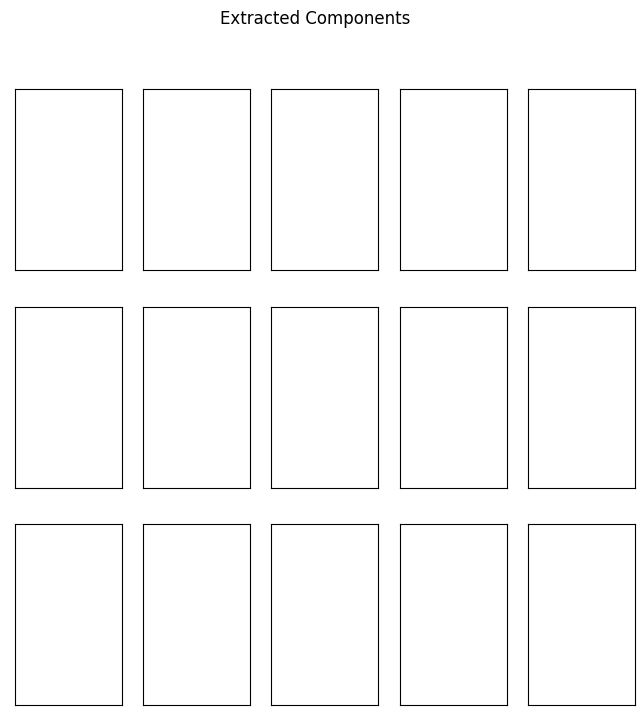

In [52]:
image_shape = people.images[0].shape

fig, axes = plt.subplots(3, 5, figsize=(8,8),
    subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
        ax[0].imshow(comp_kmeans.reshape(image_shape))
        ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
        ax[2].imshow(comp_nmf.reshape(image_shape)
)

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
    figsize=(8,8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0,0].set_ylabel("original")
axes[1,0].set_ylabel("kmeans")
axes[2,0].set_ylabel("pca")
axes[3,0].set_ylabel("nmf")



- interestingly, when performing vector quantization using kmeans we use many more clusters than input dimensions to encode our data

Cluster memberships:
:[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


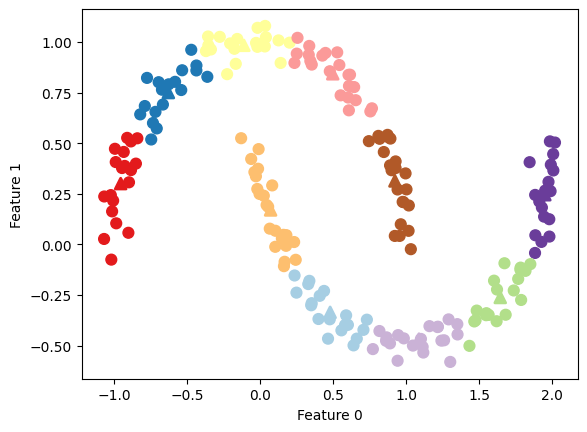

In [12]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans= KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60,
    marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print("Cluster memberships:\n:{}".format(y_pred))

- we can view this as each point having 10 new features, each being 0 save the one that represens the cluster center the point is assigned.
- using the 10-dimensional representation, it is possible to separate the two half-moon shapes using a linear model.
- we can make an even more expressive representation of the data by using the distances to each of the cluster centers as features.

In [13]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))


Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


---
## Agglomerative Clustering
- collection of clustering algorithms that all build upon the same principles:
1. the algorithm starts by declaring each point its own cluster
2. merges the two most similar clusters until some stopping criterion is satisfied
- "linkage" criteria specify how exactly the "most similar cluster" is measured
- three choices of "linkage" implemented in scikit-learn
1. ward - the default choice, picks the two clusters to merge such that the variance within all clusters increases the least. often leads to clusters that are relatively equally sized.
2. average - linakge merges the two clusters that have the smallest average distance between all their points
3. complete - a/k/a maximum linkage, merges the two clusters that have the smallest maximum distance between their points
- ward typically works, but if clusters have very dissimilar numbers of member, average or complete might work better
- Because of the way the algorithm works, agglomerative clustering cannot make predictions for new data points (and thus no *predict* method).
- to build the model and get the cluster memberships on the training set, use the fit_predict method instead.

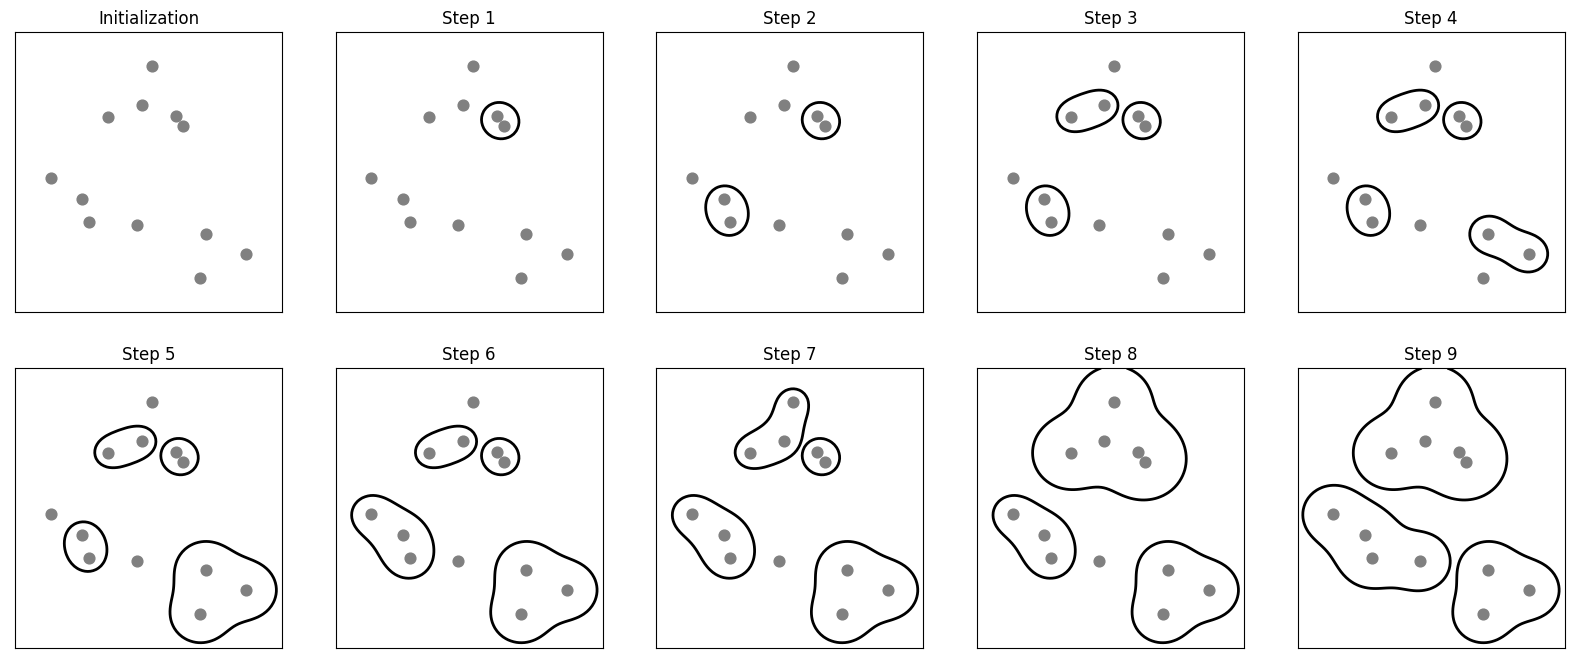

In [14]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

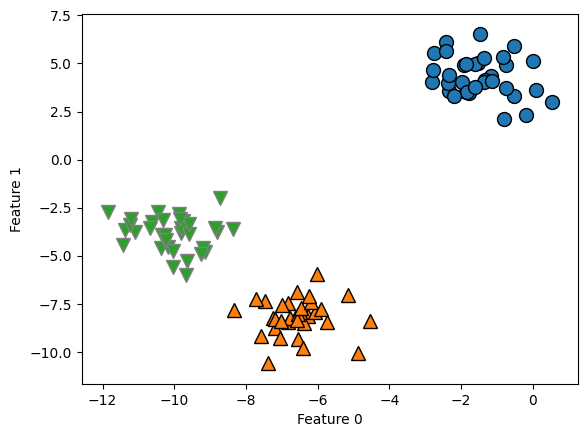

In [15]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")



## Hierarchical clustering and dendrograms
- agglomerative clustering produces what is known as hierarchical clustering
- clustering proceeds iteratively, every point makes a journey from being a single pont cluster to belonging to some final cluster
- helpful to look at all possible clusterings jointly


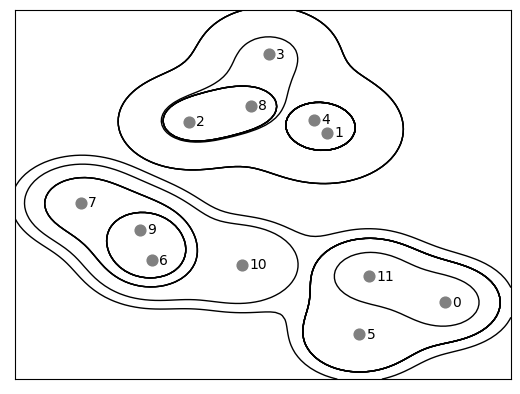

In [16]:
mglearn.plots.plot_agglomerative()

Text(0, 0.5, 'Cluster distance')

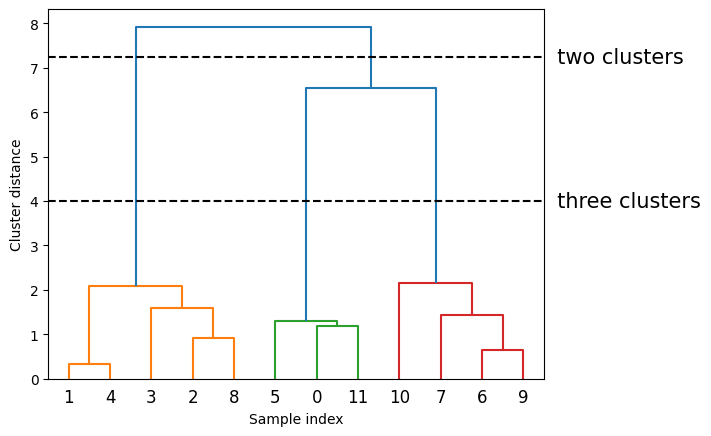

In [17]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X,y = make_blobs(random_state=0, n_samples=12)

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances between clusters
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c= 'k')
ax.plot(bounds, [4,4], '--', c='k')

ax.text(bounds[1], 7.25, '  two clusters', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, '  three clusters', va='center', fontdict={'size':15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")



- agglomerative algorithms still fails to separate complex shapres like the two_moons dataset as one would expect


---
## DBSCAN
- "density-based spatial clustering of applications with noise"
- does not require the user to set the number of clusters *a priori*
- CAN capture clusters of complex shapes, and identify points that are not part of any cluster
- slower than agglomerative clustering and k-means, but scales to relatively large datasets
- identifying points in "crowded" regions of the feature space, designating a dense region. 
- points that are within a dense region are called core samples
    - parameters *min_samples* and *eps* define core samples. if there are at least min_samples many data points within a distance of eps to a given data point, that data point is classified as a core sample
    - core samples that are closer to each other than the distance eps are put into the same cluster by DBSCAN
- three kinds of points, core points, points that are within distance *eps* of core points (called *boundary points*), and noise
- boundary points might be neighbor to core samples of more than one cluster, and membership to a particular cluster can be determined by the order in which clusters were formed by the algorithm


In [18]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))



Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


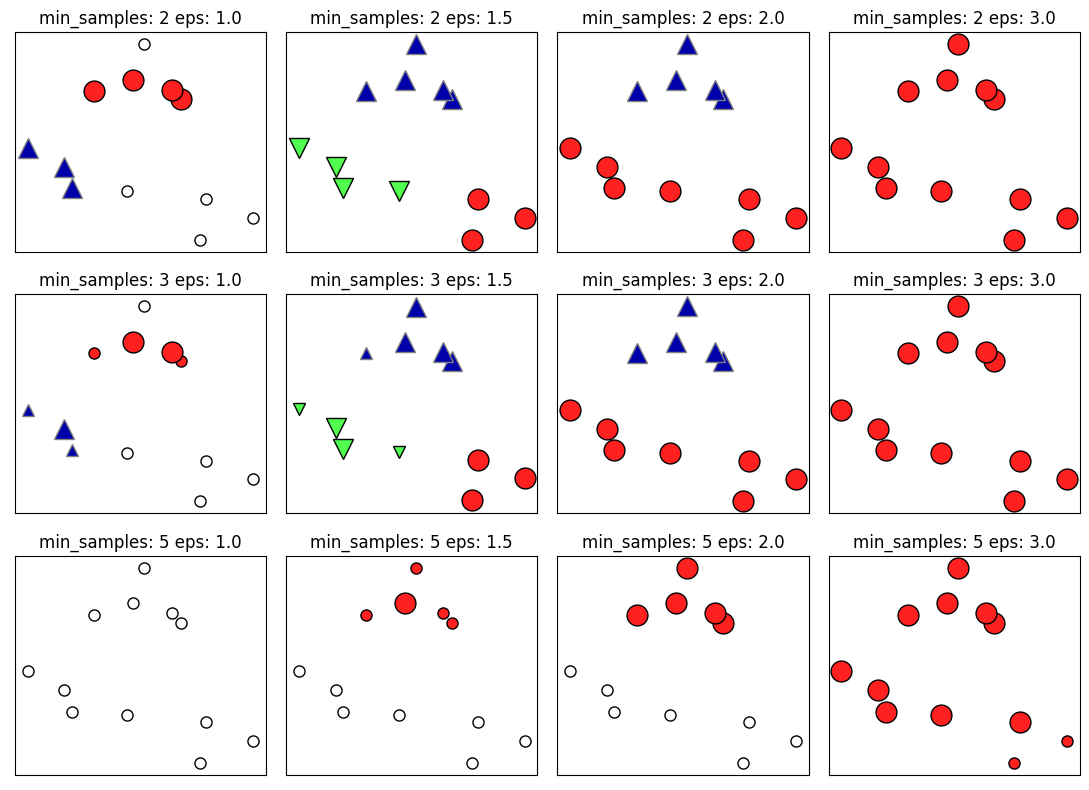

In [19]:
mglearn.plots.plot_dbscan()

- min_samples setting largely determines whether points in less dense regions will be labeled as outliers or as their own clusters
- eps implicity controls how many clusters will be found
- finding a good setting for eps is sometimes easier after scaling the data using StandardScaler or MinMaxScaler


Text(0, 0.5, 'Feautre 1')

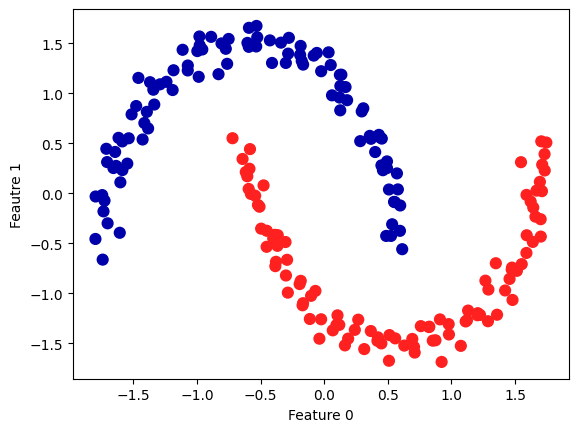

In [20]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler


X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
#plot the cluster assignments
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feautre 1")

---
## Comparing and Evaluating Clustering Algorithms
- very difficult to assess how well an algorithm worked, and to compare outcomes between different algorithms



### Evaluating clustering with ground truth
- metrics that can be used to assess the outcome of a clustering algorithm relative to a ground truth clustering
1. Adjusted Rand Index (ARI)
2. Normalized Mutual Information (NMI)


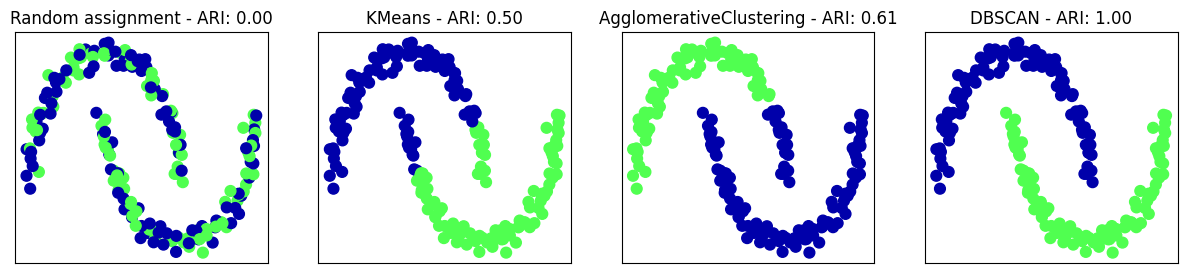

In [21]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

fig, axes, = plt.subplots(1, 4, figsize=(15,3),
    subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters,
    cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0,], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))



- adjusted rand index (ARI) grants intuitive results, with a random cluster assignment having a score of 0 and DBSCAN having a score of 1.
- common mistake is using *accuracy_score* instead of *adjusted_rand_score, *normalized_mutual_info_score*, or some other clustering metric when evaluating clustering
- evaluating on labels exactly matching between ground truth and those assigned to cluster via the algorithms is meaningless, as the cluster labels themselves are inherently meaningless from the clustering algorithms
- only thing that matters is which points are in the same cluster


In [22]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import accuracy_score
# these two labelings of points correspond to the same clustering
clusters1 = [0,0,1,1,0]
clusters2 = [1,1,0,0,1]

#accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
print("ARI {:.2f}".format(adjusted_rand_score(clusters1,clusters2)))

Accuracy: 0.00
ARI 1.00


### Evaluating clustering without ground truth
- potential problem using measures like ARI, is what happens when there is no ground truth to which to compare the results
- Hence ARI and NMI are typically only used in developing algorithms, not in assessing success in an application
- *silhouette coefficient* can score clustering while not requiring ground truth, however these often don't work well in practice.
    - silhouette score computes the compactness of a cluster, where higher is better, with a perfect score of 1
    - while compact clusters are good, compactness doesn't allow for complex shapes


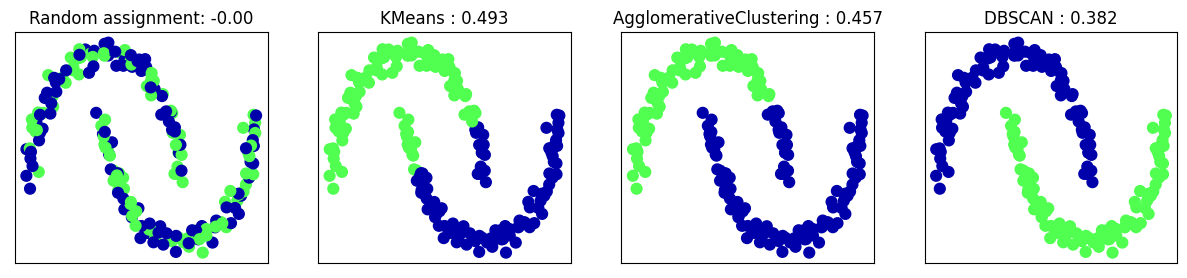

In [24]:
from sklearn.metrics.cluster import silhouette_score

X,y = make_moons(n_samples=200, noise=0.05, random_state=0)
#rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15,3),
    subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

#plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:,1], c=random_clusters,
    cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
        silhouette_score(X_scaled, random_clusters)))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    #plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} : {:.3f}". format(algorithm.__class__.__name__,
        silhouette_score(X_scaled, clusters)))



- against our "preferred" result, the highest silhouette score is found to be k-means and not DBSCAN
- a slightly beter strategy for evaluating clusters is using *robustness-based* clustering metrics
    - These run an algorithm after addingsome noise to the data, or using different parameter settings, and compare the outcomes
    - The idea being given the changes to parameters and many perturbations, if we receive the same result it is likely trustworthy
- no robustness-based clustering metric was available in scikit-learn at the time of this book

- even if results from our evaluation of robust clustering or a high silhouette score, we still don't know if there is any semantic meaning in the clustering, or whether the clustering reflects an aspect of the data that we are interested in.
- only was to know wether the clustering correspponds to anything we are interested in is to analyze the clusters manually

### Comparing algorithms on the faces dataset

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)


In [28]:
# apply DBSCAN with defaul parameters
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels : {}".format(np.unique(labels)))

Unique labels : [-1]


- dbscan() returning labels of only "-1" show all the data was labeled as "noise"
- we can now make changes to its parameters *eps* and *min_samples* to consider smaller groups of points as clusters


In [30]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique label: {}".format(np.unique(labels)))

Unique label: [-1]


In [31]:
# need to increase eps
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0]


In [33]:
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))


Number of points per cluster: [  31 2032]


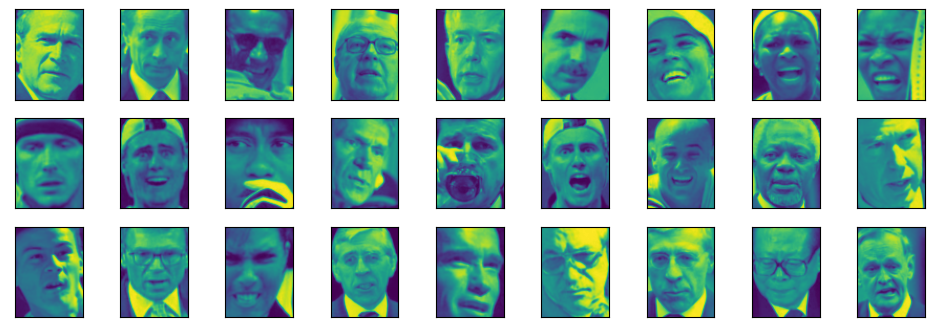

In [58]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
    figsize=(12,4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

- appears each has some feature in the image that may allude to why it may be an outlier
    - crop is too close or too far, a glass, headband, hand, or hat covering part of the face
- trying to find "the dd one out" is called *outlier detection*
- looking for more interesting clusters than just one large one, we need to set eps smaller.

In [59]:
for eps in [1,3,5,7,9,11]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Clusters present: {}".format(np.unique(labels)))
    print("Cluster sizes: {}".format(np.bincount(labels +1)))


eps=1
Clusters present: [-1]
Cluster sizes: [2063]

eps=3
Clusters present: [-1]
Cluster sizes: [2063]

eps=5
Clusters present: [-1]
Cluster sizes: [2063]

eps=7
Clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
Cluster sizes: [2003    4   14    7    4    3    3    4    4    3    3    5    3    3]

eps=9
Clusters present: [-1  0  1  2]
Cluster sizes: [1306  751    3    3]

eps=11
Clusters present: [-1  0]
Cluster sizes: [ 413 1650]


- with never more than one large cluster, at most, there is on large cluster containing most of the points and some smaller clusters.clusters
- this indicates that there are not two or three different kinds of face images that are very distinct, but rather tha all image are more or less equally similar to (or dissimilar from) the rest


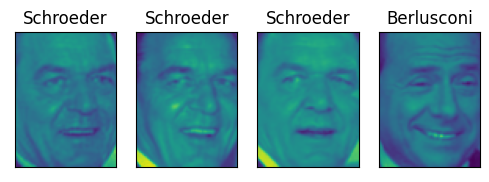

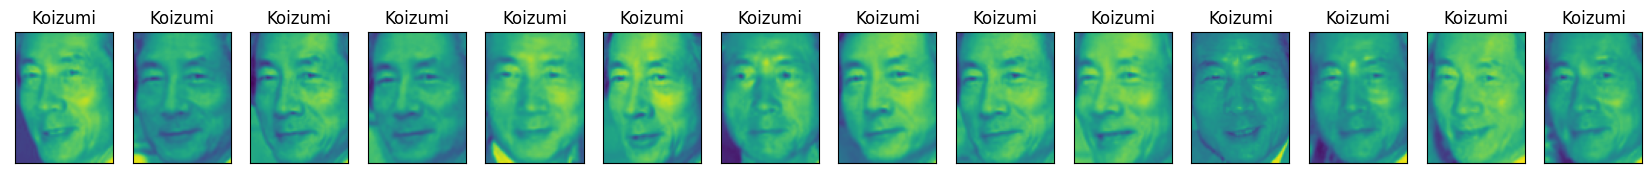

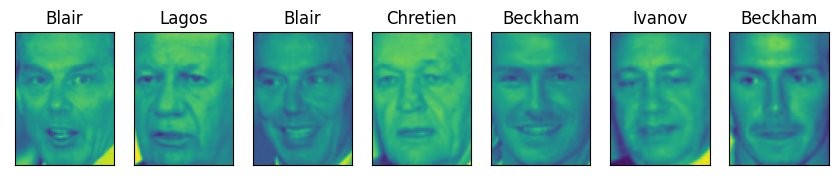

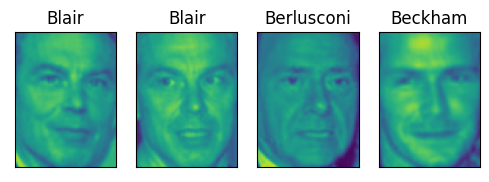

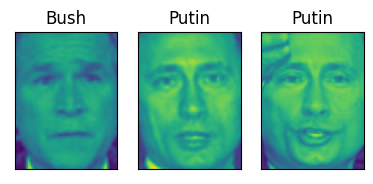

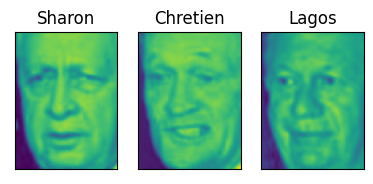

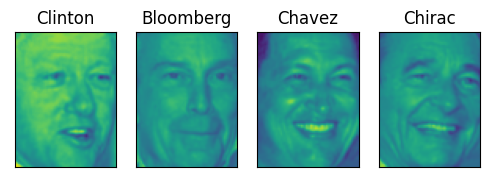

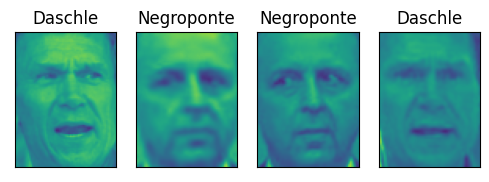

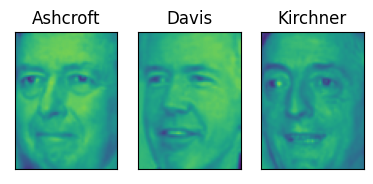

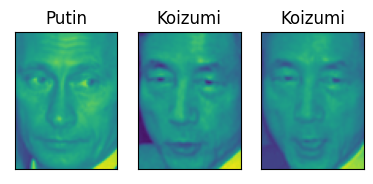

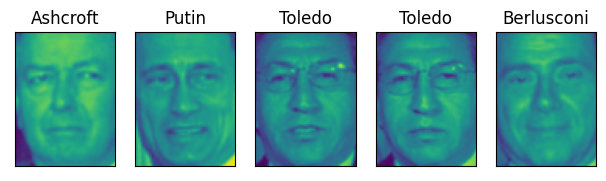

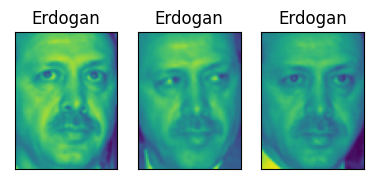

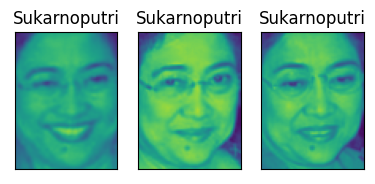

In [66]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)
for cluster in range(max(labels)+1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
        subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

In [ ]:
km = KMeans(n_clusters=10,random_state=0)